Alex Germick Assignment 2
Github link: 

Read Data and Load Packages

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
stocks = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")
stocks['Date'] = pd.to_datetime(stocks['Date'])  

In [133]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null datetime64[ns]
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.0+ MB


1) Our Stocks Market Average for '06 to '18

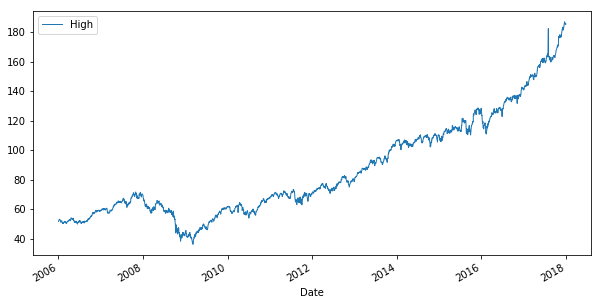

In [134]:
stocks1 = stocks.pivot_table(values="High",index="Date",aggfunc=np.mean)
stocks1.plot.line(x=stocks1.index,y='High',figsize=(10,5),lw=1)

2) Our Index Low and High for 2008

Text(0.5,1,'2008 Down Year')

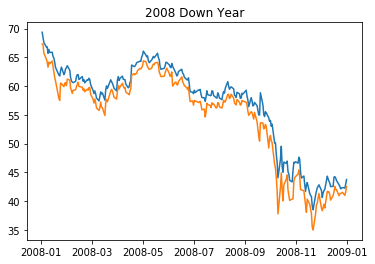

In [135]:
stocks2 = stocks.pivot_table(values=["High","Low"],index="Date",aggfunc=np.mean)
stocks2 = stocks2.reset_index()
stocks2= stocks2[(stocks2['Date'] > '2008-1-1') & (stocks2['Date'] <= '2008-12-31')]

fig, ax = plt.subplots()

ax.plot(stocks2['Date'], stocks2['High'])
ax.plot(stocks2['Date'], stocks2['Low'])

ax.set_title("2008 Down Year")



3) Tech Sector Relationships: Which stocks are most related to each other?

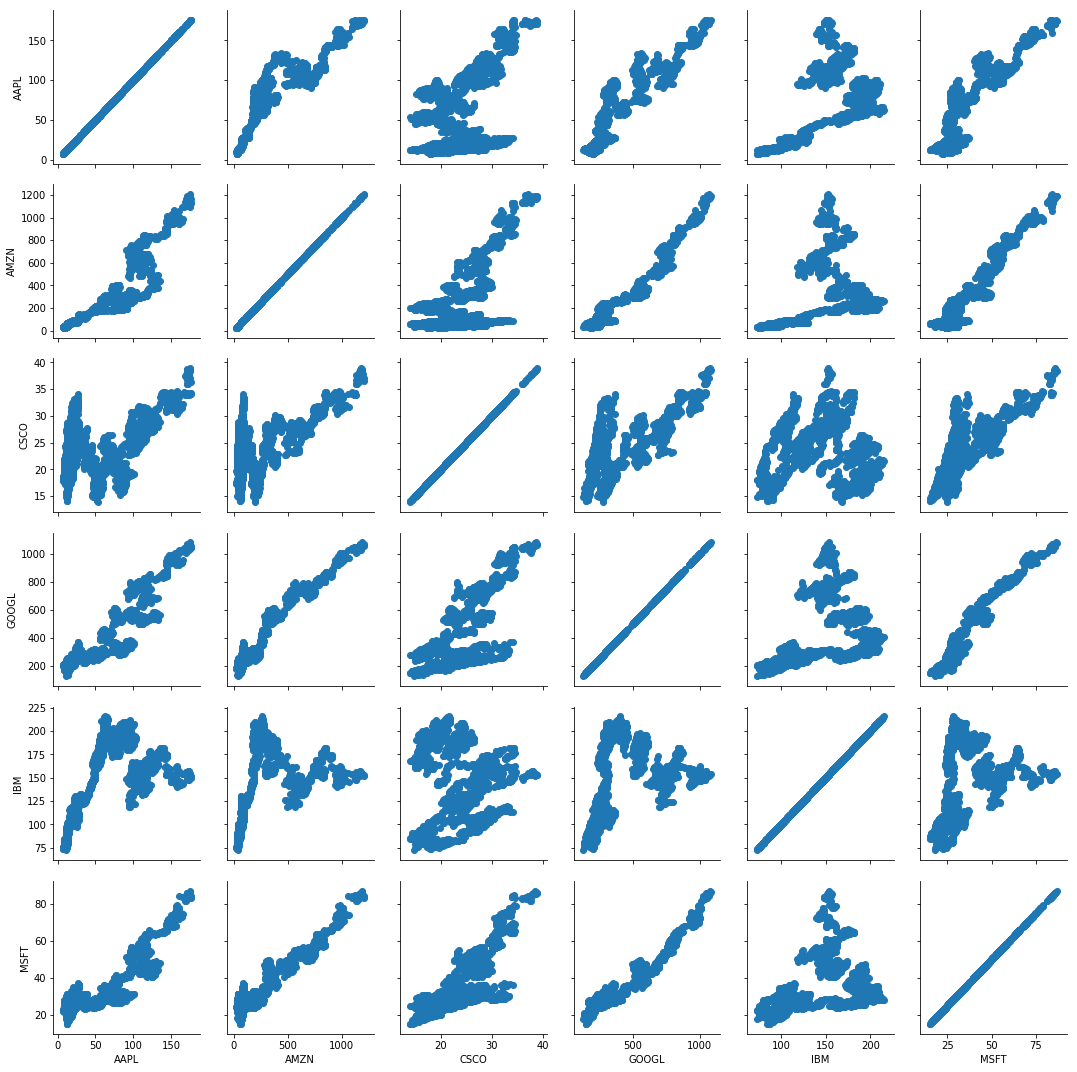

In [136]:
stocks3 = stocks[(stocks["Name"] == "AAPL") |(stocks["Name"] == "AMZN")|(stocks["Name"] == "MSFT")|(stocks["Name"] == "GOOGL")|(stocks["Name"] == "IBM")|(stocks["Name"] == "CSCO")]  
stocks3 = stocks3.pivot_table( values="Open",index="Date", columns ="Name" , aggfunc=np.mean)
tech = sns.PairGrid(stocks3)
tech.map(plt.scatter)

4) Tech Sector vs. Market Average in 2008

Text(0.5,1,'Tech vs. Rest')

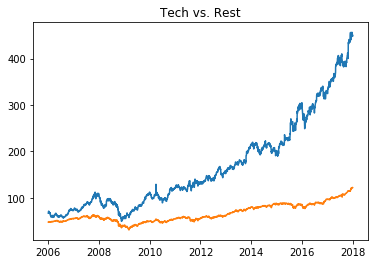

In [137]:
stocks4a = stocks[(stocks["Name"] == "AAPL") |(stocks["Name"] == "AMZN")|(stocks["Name"] == "MSFT")|(stocks["Name"] == "GOOGL")|(stocks["Name"] == "IBM")|(stocks["Name"] == "CSCO")]
stocks4a = stocks4a.pivot_table(values="High",index="Date",aggfunc=np.mean)
stocks4a = stocks4a.reset_index()
stocks4b = stocks[(stocks["Name"] != "AAPL") & (stocks["Name"] != "AMZN") & (stocks["Name"] != "MSFT") & (stocks["Name"] != "GOOGL") & (stocks["Name"] != "IBM") & (stocks["Name"] != "CSCO")]
stocks4b = stocks4b.pivot_table(values="High",index="Date",aggfunc=np.mean)
stocks4b = stocks4b.reset_index()
fig, ax = plt.subplots()

ax.plot(stocks4a['Date'], stocks4a['High'])
ax.plot(stocks4b['Date'], stocks4b['High'])

ax.set_title("Tech vs. Rest")

5) Which is more volatile, Google or Amazon? Daily growth from 08 to 17

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


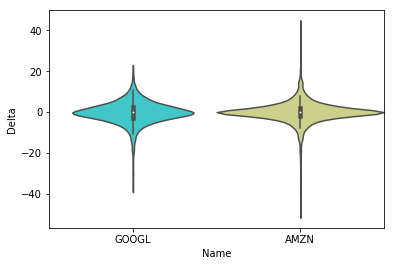

In [138]:
stocks5 = stocks[(stocks["Name"] == "AMZN")|(stocks["Name"] == "GOOGL")]
stocks5["Delta"] = stocks5["Close"]-stocks5["Open"]
sns.violinplot(x="Name", y="Delta", data=stocks5,palette='rainbow', width=1)

6) Google and Amazon Relationship

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


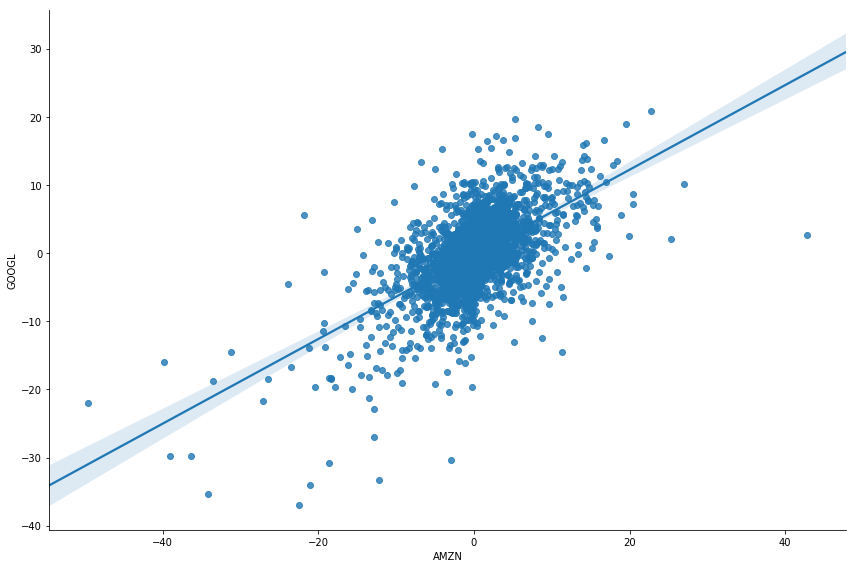

In [139]:
stocks6 = stocks[(stocks["Name"] == "GOOGL") |(stocks["Name"] == "AMZN")]
stocks6["Delta"] = stocks6["Close"]-stocks6["Open"]
stocks6 = stocks6.pivot_table(values="Delta",index="Date", columns="Name",aggfunc=np.mean)
stocks6.head()

sns.lmplot(x='AMZN',y='GOOGL',data=stocks6, palette='coolwarm', aspect=1.5,size= 8)

7) Amazon Daily Performance 2008 vs. 2012 vs. 2016 [Replace Stock Symbol to view others]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

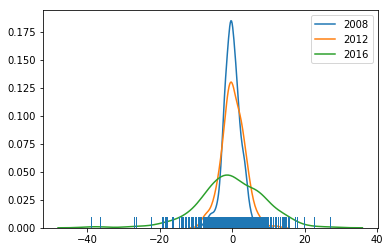

In [140]:
stocks["Delta"]= stocks["Close"]-stocks["Open"]
stocks7 = stocks[(stocks["Name"] == "AMZN")]

stocks7a = stocks7[(stocks7['Date'] > '2008-1-1') & (stocks7['Date'] <= '2008-12-31')]
stocks7a["2008"]=stocks7a["Delta"]

stocks7b = stocks7[(stocks7['Date'] > '2012-1-1') & (stocks7['Date'] <= '2012-12-31')]
stocks7b["2012"]=stocks7b["Delta"]

stocks7c = stocks7[(stocks7['Date'] > '2016-1-1') & (stocks7['Date'] <= '2016-12-31')]
stocks7c["2016"]=stocks7c["Delta"]

sns.kdeplot(stocks7a['2008'], kernel="gau")
sns.rugplot(stocks7a['2008'])
sns.kdeplot(stocks7b['2012'], kernel="gau")
sns.rugplot(stocks7b['2012'])
sns.kdeplot(stocks7c['2016'], kernel="gau")
sns.rugplot(stocks7c['2016'])

8) Day of Week analysis for Oil stocks Chevron and Exxon

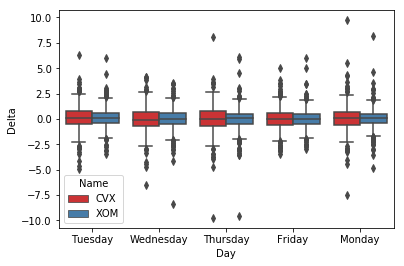

In [141]:
stocks['Day'] = stocks['Date'].dt.weekday_name
stocks8 = stocks[(stocks["Name"]=='CVX')|(stocks["Name"]=='XOM')]

sns.boxplot(x="Day", y="Delta", data=stocks8, hue='Name',palette='Set1',dodge=True)

9) Which day of week do tech companies grow the most? [Weekend & After bell hours growth not captured]

Name        AAPL    AMZN   CSCO   GOOGL    IBM   MSFT
Day                                                  
Friday    -50.24  -84.58  -1.98 -464.33  -6.93 -13.89
Monday     82.08  -21.58  11.65   50.97  97.11  17.61
Thursday  -49.63  120.13   2.15 -289.99  77.75   9.74
Tuesday    -0.44  111.94  10.71  193.05  97.72  22.06
Wednesday -13.22   -2.37   1.31   36.92  42.43  14.58


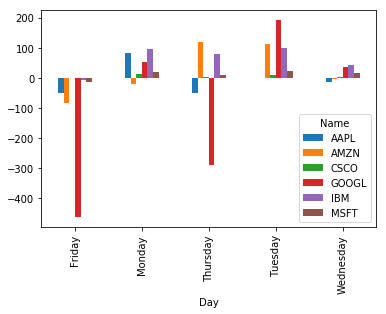

In [146]:
stocks9 = stocks[(stocks["Name"] == "AAPL") |(stocks["Name"] == "AMZN")|(stocks["Name"] == "MSFT")|(stocks["Name"] == "GOOGL")|(stocks["Name"] == "IBM")|(stocks["Name"] == "CSCO")]  
stocks9 = stocks9.pivot_table(values="Delta",index="Day", columns ="Name" , aggfunc=np.sum)
print(stocks9)
stocks9.plot.bar()

10) Growth for Google by Day

In [ ]:
stocks10 = stocks[stocks["Name"]=="GOOGL"]
stocks10["PCT"] = stocks10.Open.pct_change() * 100

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(stocks10, row="Day", hue="PCT", aspect=15, size=.5, palette=pal)
g.map(sns.kdeplot, "PCT", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
